## Heart_Disease_ML

Md. Rakibul Hasan
<br> Civil Engineer
<br> MS in Disaster Management (Contd.), University of Dhaka.


#### Objectives:
1. Load the dataset and perform data preprocessing
2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding
3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?
4. Perform Grid Search and Cross-Validation with Decision Tree Classifier
5. Show a tree diagram of the Decision Tree
6. Show the Confusion Matrix, Classification report, and ROC-AUC
7. Explain accuracy, precision, recall, f1 score

#### References:
Dataset Source: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv 
<br> Actual Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

### import required libraries and packages

In [35]:
import pandas as pd
import numpy as np


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [36]:
# Import data from a CSV file
df = pd.read_csv("Churn.csv")

In [37]:
# Display the dataframe data
display(df.head(10))

# Display Dataframe shape
display(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Comment:

There is no missing value in the dataset
<br> Number of observations (rows) = 3333
<br> Number of columns = 21 (20 feature variables and 1 target variable)

#### Data preprocessing

In [39]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


- One hot encoding is better for this data analysis because categorical variables (Churn,Intl_plan,Vamil_plan) in the dataset are not numerical.
- Data Transformation improve model performance.Transformations of training data can reduce the skewness of data as well as the prominence of outliers in the data.
- Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization or normalization is not needed before fitting this kind of models.

In [40]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Target variable

In [42]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### Feature and target variable separation

In [43]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### One-hot Encoding or Label Encoding
**We apply One-Hot Encoding when:**

- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied.

In this dataset, there are three categorical features are NAN columns. So, they are not ordinal and also in number there are less number of categorical variables.

In addition, each label is assigned a unique integer based on alphabetical ordering in Label Encoding technique. And prediction performance is not also better than One-hot encoding for this data set.

#### That's I am choosing One-hot encoding

#### One-hot encoding

In [44]:
df = pd.get_dummies(df, drop_first=True)

#### Train test separation

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Stratification

In [46]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.16942355889724312


In [47]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.1695906432748538


#### Training: Decision Tree Classifier

In [48]:
# model = LogisticRegression()
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
model = model.fit(X_train, y_train)

#### Prediction

In [49]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [50]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
2386,1,1.0,1
1683,0,0.0,0
338,0,0.0,0
2824,1,1.0,1
1299,1,1.0,1
3264,0,0.0,0
1645,0,0.0,0
198,1,0.0,0
2990,0,0.0,0
2844,0,0.0,0


In [51]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
1907,88,28,190.6,237.3,211.6,9.8,2,0,1,104,32.40,105,20.17,116,9.52,1,2.65,0,0.0,0
1336,124,0,251.5,214.2,186.1,11.1,3,0,0,85,42.76,98,18.21,71,8.37,6,3.00,0,0.0,0
106,36,29,281.4,202.2,187.2,9.0,2,0,1,102,47.84,76,17.19,113,8.42,6,2.43,0,0.0,0
2130,93,0,239.8,251.8,168.6,10.9,1,0,0,70,40.77,99,21.40,112,7.59,10,2.94,0,0.0,0
2368,90,0,246.4,160.3,170.9,7.6,1,0,0,83,41.89,88,13.63,99,7.69,7,2.05,0,0.0,0
2408,68,0,232.4,153.3,214.6,10.5,1,0,0,76,39.51,103,13.03,107,9.66,2,2.84,0,0.0,0
3145,62,0,186.8,207.6,195.0,8.8,3,0,0,94,31.76,92,17.65,98,8.78,4,2.38,0,0.0,0
650,140,0,235.5,257.2,103.1,11.5,2,0,0,81,40.04,130,21.86,111,4.64,4,3.11,0,0.0,0
427,67,40,104.9,216.3,217.4,9.6,1,0,1,65,17.83,93,18.39,128,9.78,9,2.59,0,1.0,1
162,141,36,187.5,241.4,229.5,10.5,3,0,1,99,31.88,116,20.52,105,10.33,5,2.84,0,0.0,0


#### Data Transformation (StandardScaler or MinMaxScaler)

In [52]:
# scaler = StandardScaler() # For StandardScaler
# scaler = MinMaxScaler() # For MinMaxScaler

# print(scaler.fit(test))

In [53]:
# print(scaler.mean_) # For StandardScaler
# print(scaler.data_max_) # For MinMaxScaler

In [54]:
# print(scaler.transform(test.head(10)))

#### Does Data Transformation improve model performance?
- No, Data transmission does not improve model performance actually. From this model, I am getting betetr precision with Standard Scaler or Min Max Scaler transformation.

#### Is it necessary to standardize or normalize data for tree-based machine learning models?
- Tree based algorithms such as Decision Tree, is not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models. And doesn't require normalization also.

#### Tree diagram of the Decision Tree

In [55]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

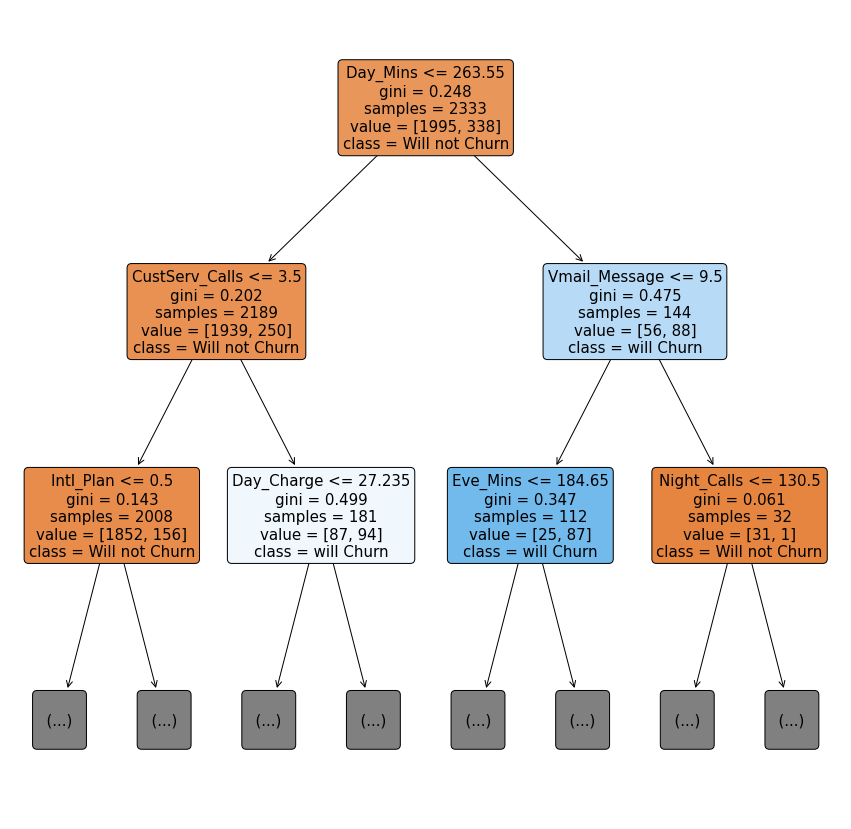

In [56]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["Will not Churn", "will Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

#### Confusion Matrix

In [57]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[815  40]
 [ 47  98]]


In [58]:
y_test['Churn'].value_counts()

0    855
1    145
Name: Churn, dtype: int64

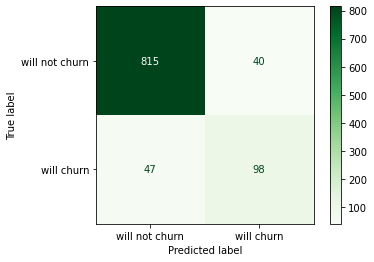

In [59]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

#### Grid Search and Cross-Validation with Decision Tree Classifier

In [60]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [61]:
y_pred = np.round(grid_result.predict(X_test), 2)

In [62]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [63]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.954936,0.920601,0.938276,0.013179,1
4,gini,7,0.940043,0.925054,0.929336,0.957082,0.937768,0.937856,0.011054,2
2,gini,5,0.937901,0.914347,0.946467,0.946352,0.942060,0.937425,0.011965,3
9,entropy,7,0.933619,0.927195,0.946467,0.931330,0.942060,0.936134,0.007088,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.937768,0.937768,0.933566,0.010728,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.894850,0.899142,0.901411,0.011525,9
5,entropy,3,0.886510,0.905782,0.907923,0.894850,0.873391,0.893691,0.012757,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Showing the Classification report, and ROC-AUC

In [64]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  815
False Negatives =  47
False Positives =  40
True Positives =  98


In [65]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.913

Scikit-Learn ________________________
Accuracy:  0.913


In [66]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.71
Recall =  0.68
f1 score =  0.69

Scikit-Learn ________________________
Precision =  0.71
Recall =  0.68
f1 score =  0.69


In [67]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.68
False Positive Rate =  0.05


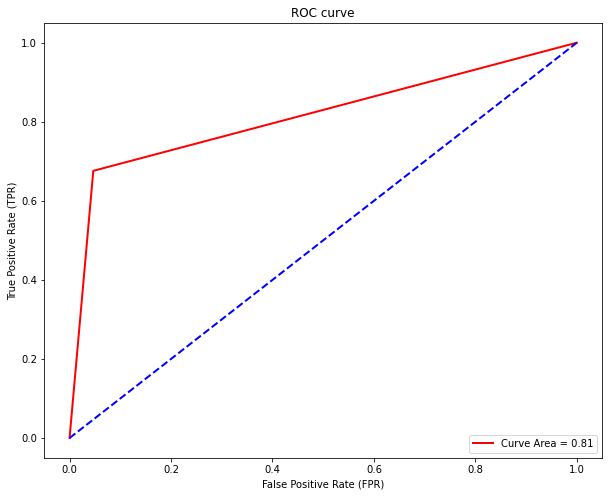

In [68]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='red', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [69]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.046784,0.675862
2,0.0,1.000000,1.000000


In [70]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.71      0.68      0.69       145

    accuracy                           0.91      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.91      0.91      0.91      1000



#### Accuracy,Precision, Recall, F1 score

#### REPORT:

model accuracy is 90% means that 10 of every 100 labels is incorrect, and 90 is correct for predicting will not churn.

Precision= Out of all the examples that predicted as positive, how many are really positive? here 90% means that model predicted as positive(will not churn) (64 + 33 =97), but really positive (will churn) only 63 people.

Recall/sensitivity = Out of all the positive examples, how many are predicted as positive? Here 64% means that all positive are (33 +64 = 97), but model predicted as positive only 64.

F1-score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

support: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.